In [1]:
# Loan Application Status Prediction
# Samrat Dey
# Batch - DS2312

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
col=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Applicant Income','Coapplicantincome','Loan_Amount','Loan_Amount_Term','Credit History','Property_Area','Loan_Status']
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv',names=col, header = None)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Coapplicantincome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This dataset includes details of applicants who have applied for loan where both numerical and categorical data present. Here 'Loan_Status' is the target variable which contains 2 categories, so it will be temed as 'Classification Problem' where we need to predict whether the loan of the applicant will be approved(Loan_status) or not.

In [5]:
df.shape

(614, 13)

The dataset contains 614 rows and 13 columns. Out of which 1 column is the taraget variable and the remaining 12 columns are independent variables

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant Income', 'Coapplicantincome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Applicant Income',
 'Coapplicantincome',
 'Loan_Amount',
 'Loan_Amount_Term',
 'Credit History',
 'Property_Area',
 'Loan_Status']

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Applicant Income       int64
Coapplicantincome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are three different types of data (object, int64 and float64) present in the dataset

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant Income      0
Coapplicantincome     0
Loan_Amount          22
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   Applicant Income   614 non-null    int64  
 7   Coapplicantincome  614 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# Replacing null values in continuous column using mean and in categorical column using mode
for i in df.columns:
    if df[i].dtypes=="object":
        mode = df[i].mode()
        df[i]=df[i].fillna(mode[0])
    else:
        df[i]=df[i].fillna(df[i].mean())
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Coapplicantincome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Applicant Income     0
Coapplicantincome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   Applicant Income   614 non-null    int64  
 7   Coapplicantincome  614 non-null    float64
 8   Loan_Amount        614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
# Checking nmber of unique values in each column
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
Applicant Income,505
Coapplicantincome,287
Loan_Amount,204
Loan_Amount_Term,11


In [15]:
# Droping Loan_ID Column
df.drop("Loan_ID", axis=1, inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Coapplicantincome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


After dropping Loan_ID column, the dataset contains 614 rows and 12 columns(Out of which 1 column is the taraget variable and the remaining 11 columns are independent variables).

In [16]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: Applicant Income, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: Coapplicantincome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: Loan_Amount, Length: 204, dtype: int64


360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0   

<Axes: >

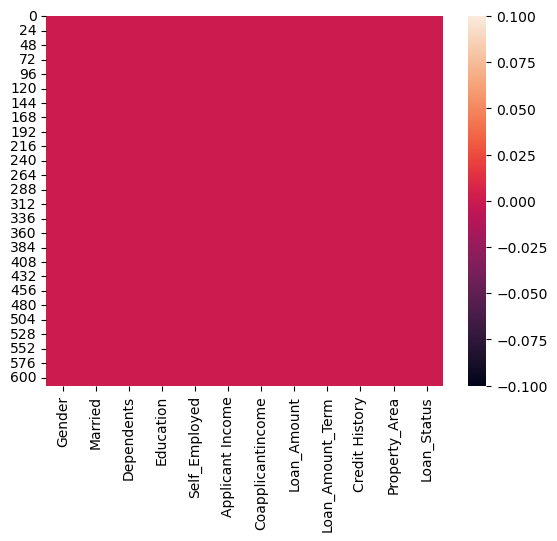

In [17]:
sns.heatmap(df.isnull())

In [18]:
# Checking nmber of unique values in each column
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
Applicant Income,505
Coapplicantincome,287
Loan_Amount,204
Loan_Amount_Term,11
Credit History,3


In [19]:
# Seperating numerical and categorical columns
# Checking for categorical column
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns are:",cat_col)
print("\n")

# Checking for numerical column
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns are:",num_col)
print("\n")

Categorical Columns are: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns are: ['Applicant Income', 'Coapplicantincome', 'Loan_Amount', 'Loan_Amount_Term', 'Credit History']




In [20]:
# Statistical summary of numerical columns
df.describe()

,Applicant Income,Coapplicantincome,Loan_Amount,Loan_Amount_Term,Credit History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


1. The counts of all the columns are same which means there are no missing values in the dataset
2. The mean value is greater than the median(50%) in 'Applicant Income', 'Coapplicantincome', 'Loan_Amount' columns, which means the data is skewed to right in these columns
3. The mean value is lesser than the median(50%) in 'Loan_Amount_Term' and 'Credit History' columns, which means the data is skewed to left in this column
4. By summerizing the data we can observe that there are difference between 75% and max in all the columns except Credit History, hence there are outliers present in the data

Y    422
N    192
Name: Loan_Status, dtype: int64


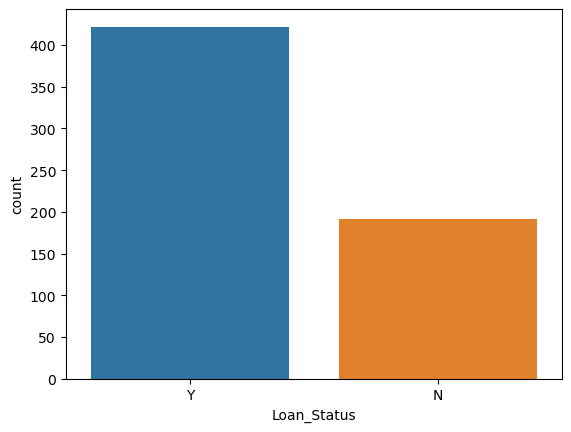

In [21]:
# Visualize the Loan_Status of applicants
ax=sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64


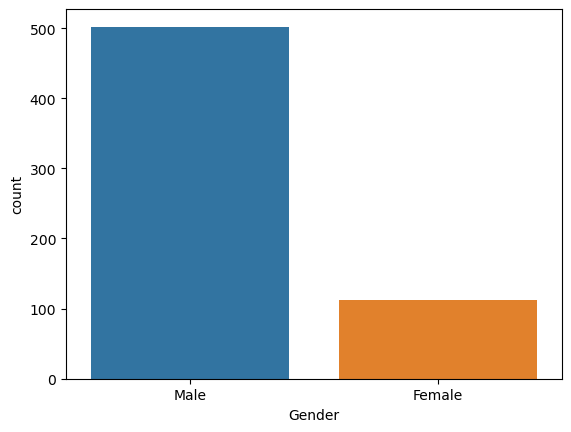

In [22]:
# Visualize the Gender of applicants
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


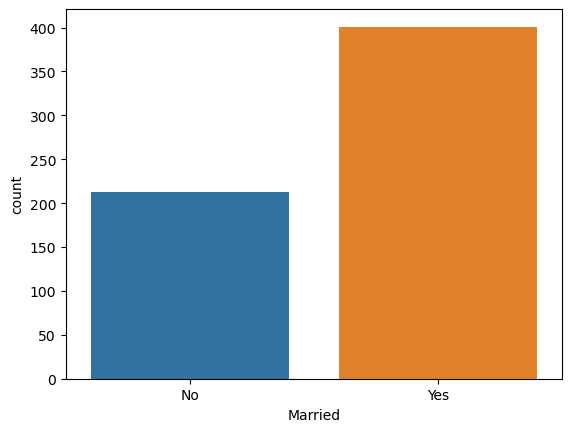

In [23]:
# Visualize that applicants are married or not
ax=sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


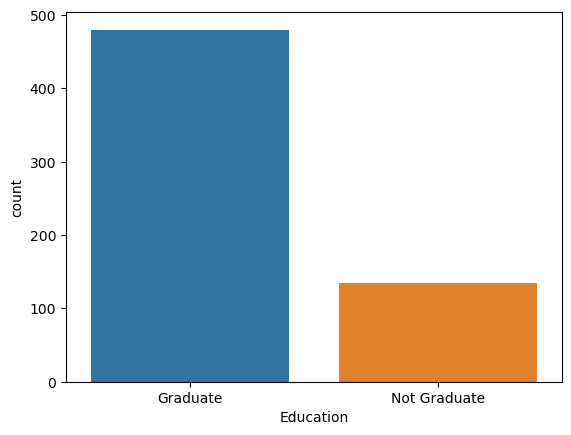

In [24]:
# Visualize the Education of applicants
ax=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


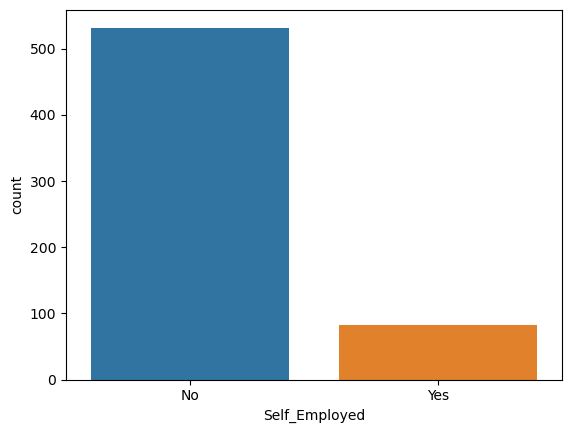

In [25]:
# Visualize that applicants are self employed or not
ax=sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


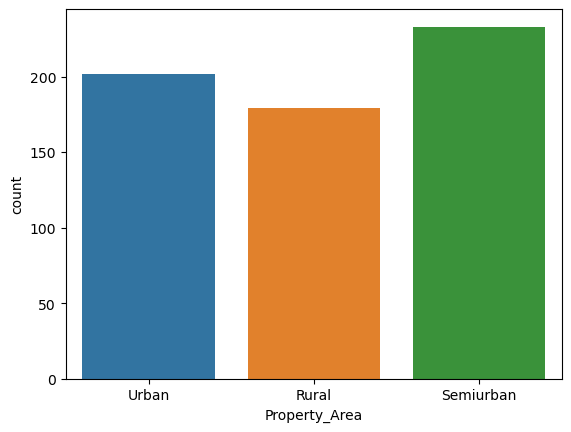

In [27]:
# Visualize the Property Area of applicants
ax=sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())

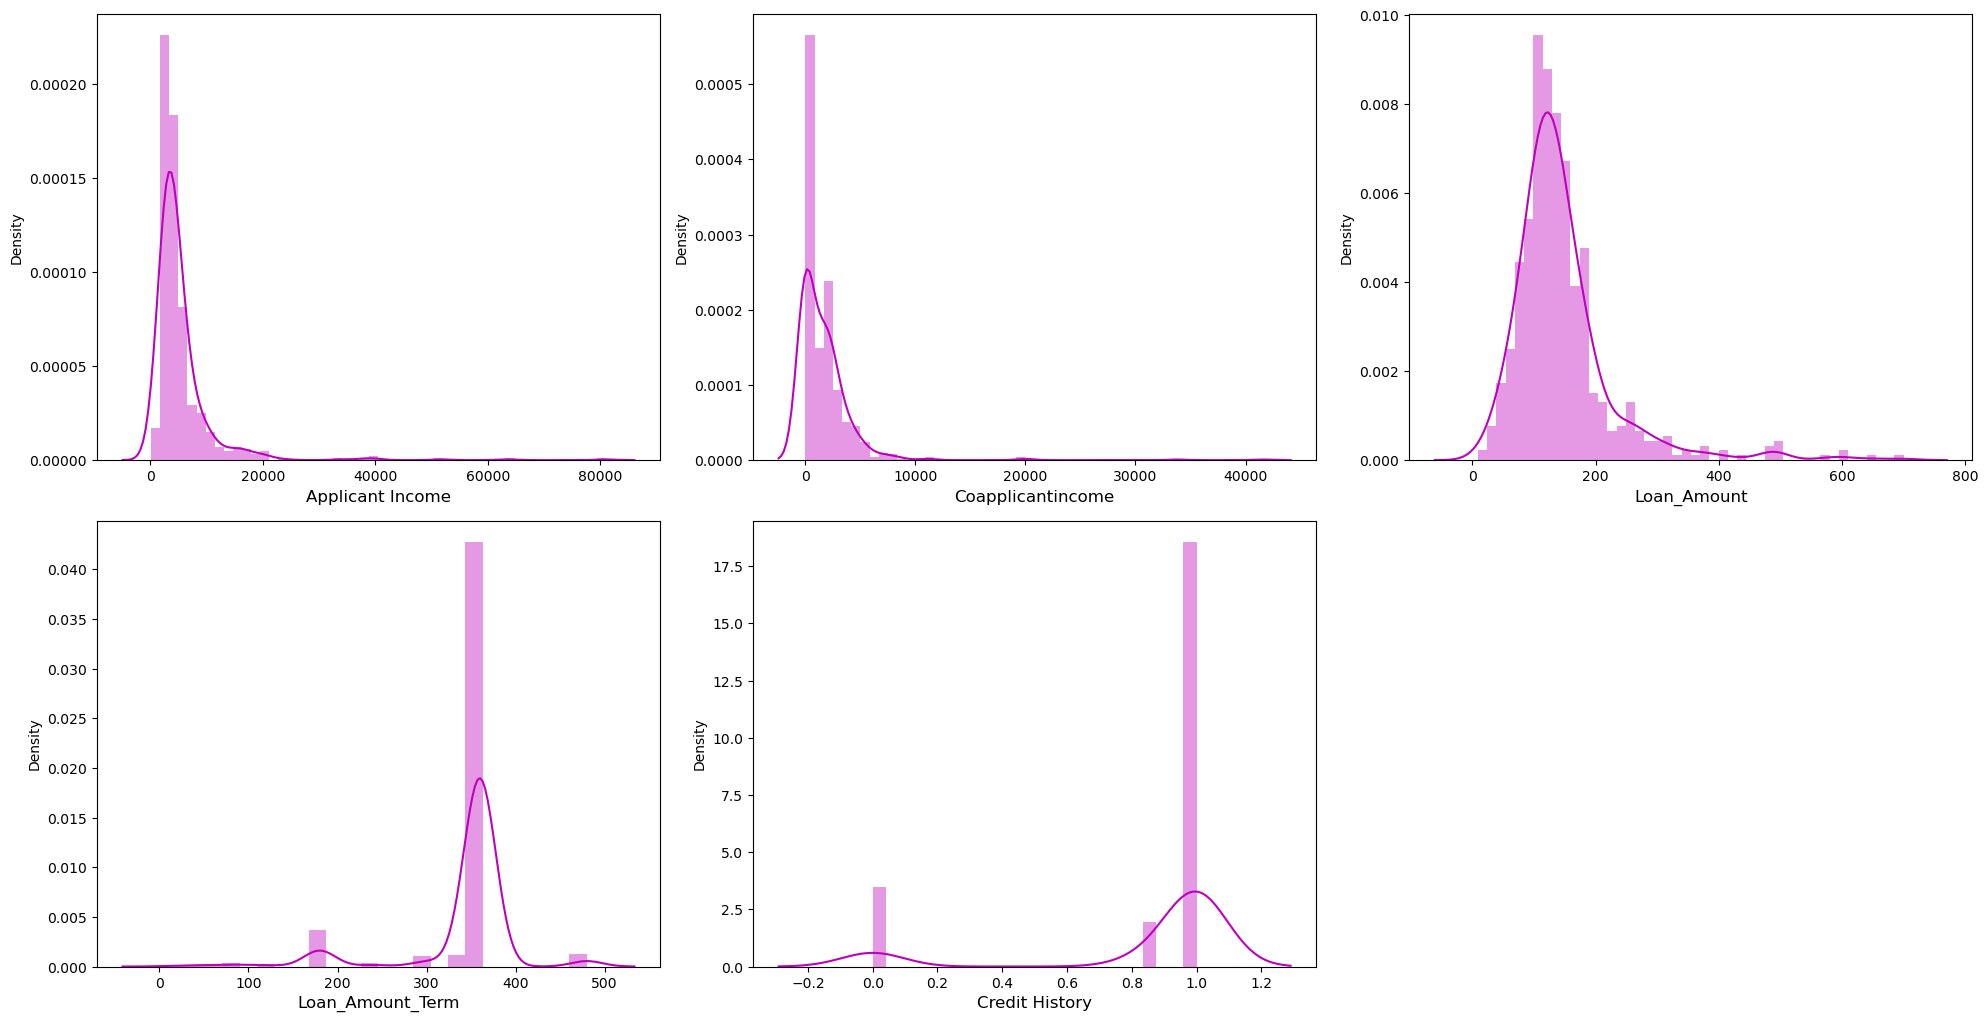

In [28]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for col in num_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

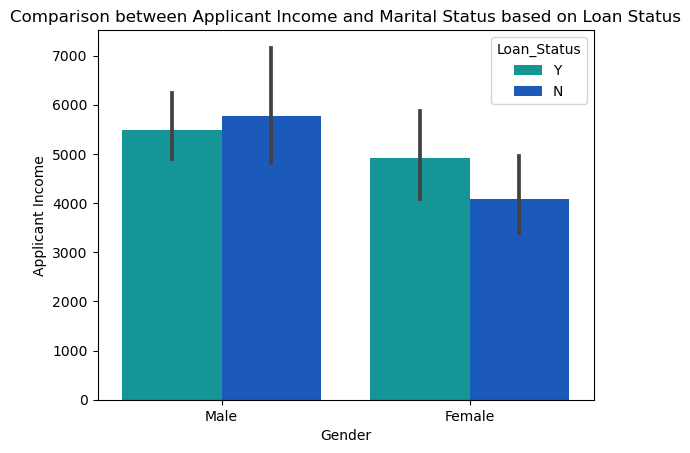

In [30]:
# Comparing Applicant Income and Gender on the basis of Loan Status
plt.title("Comparison between Applicant Income and Gender based on Loan Status")
sns.barplot(x="Gender",y="Applicant Income",data=df,palette="winter_r",hue="Loan_Status")
plt.show()

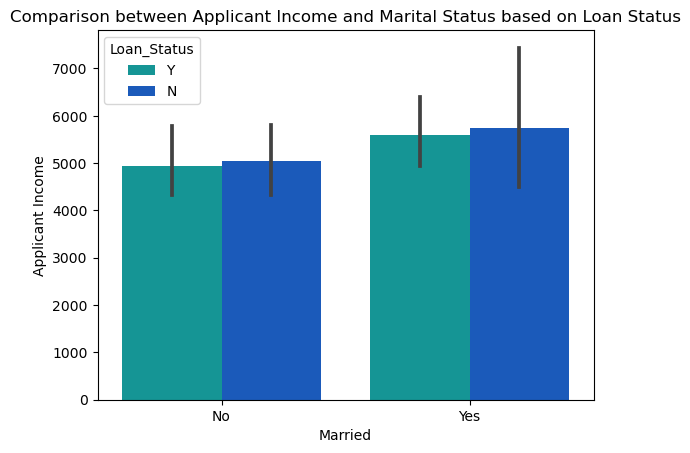

In [31]:
# Comparing Applicant Income and Marital Status on the basis of Loan Status
plt.title("Comparison between Applicant Income and Marital Status based on Loan Status")
sns.barplot(x="Married",y="Applicant Income",data=df,palette="winter_r",hue="Loan_Status")
plt.show()

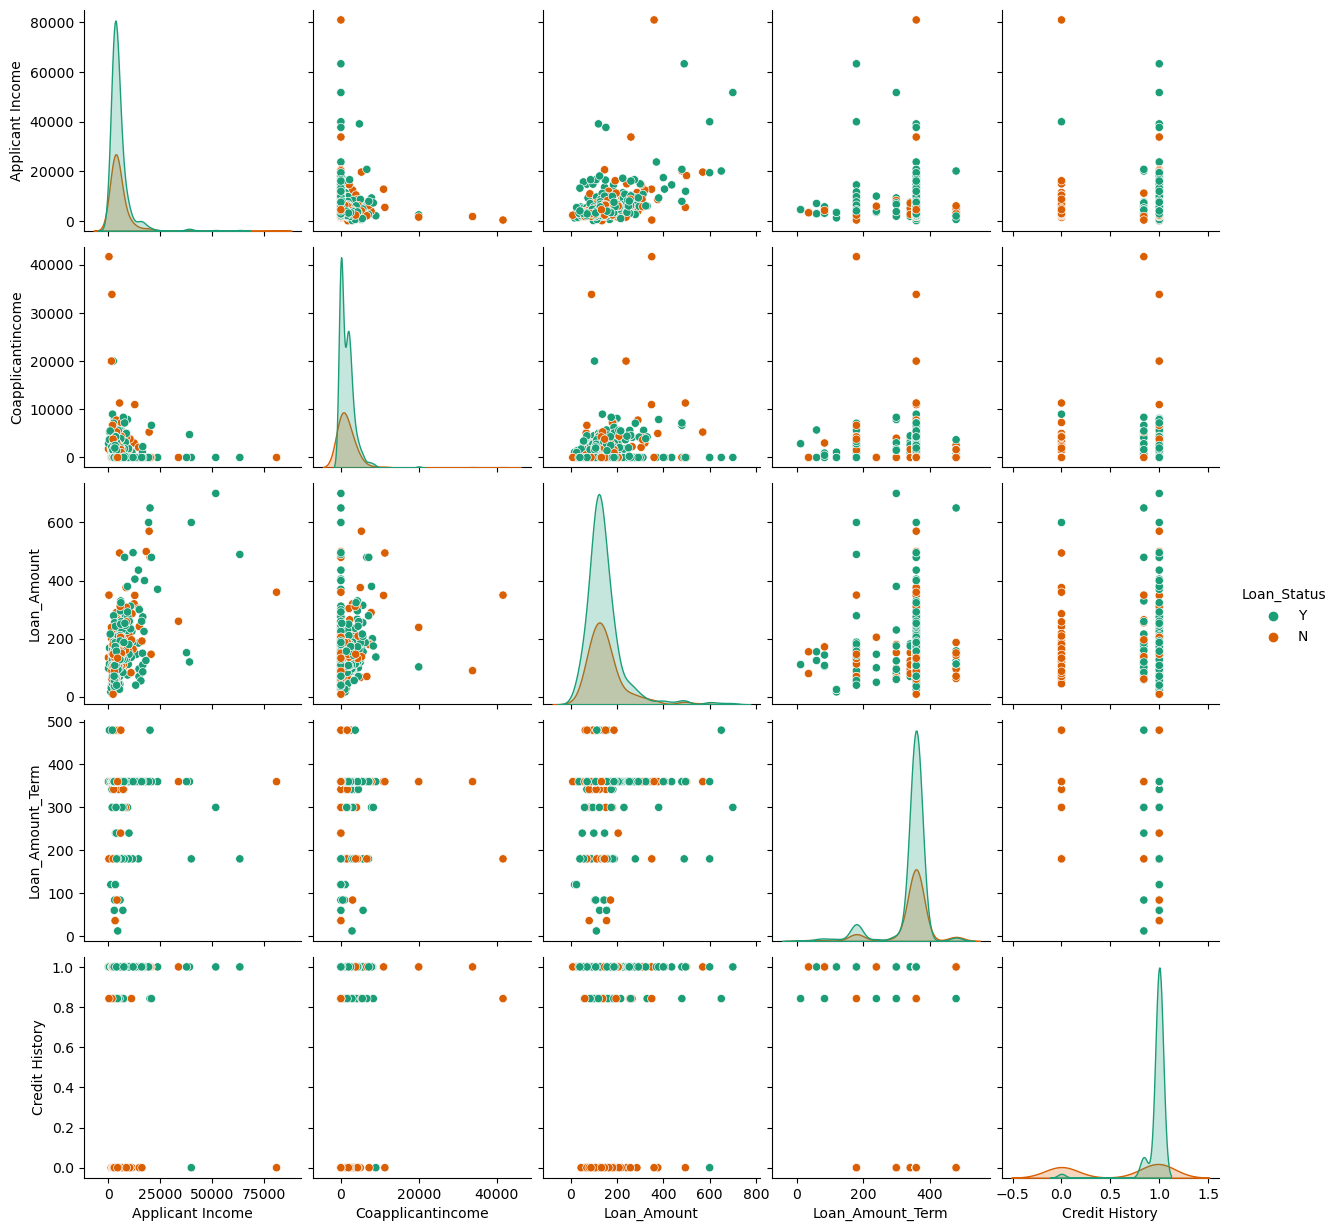

In [33]:
sns.pairplot(df,hue="Loan_Status",palette="Dark2")
plt.show()

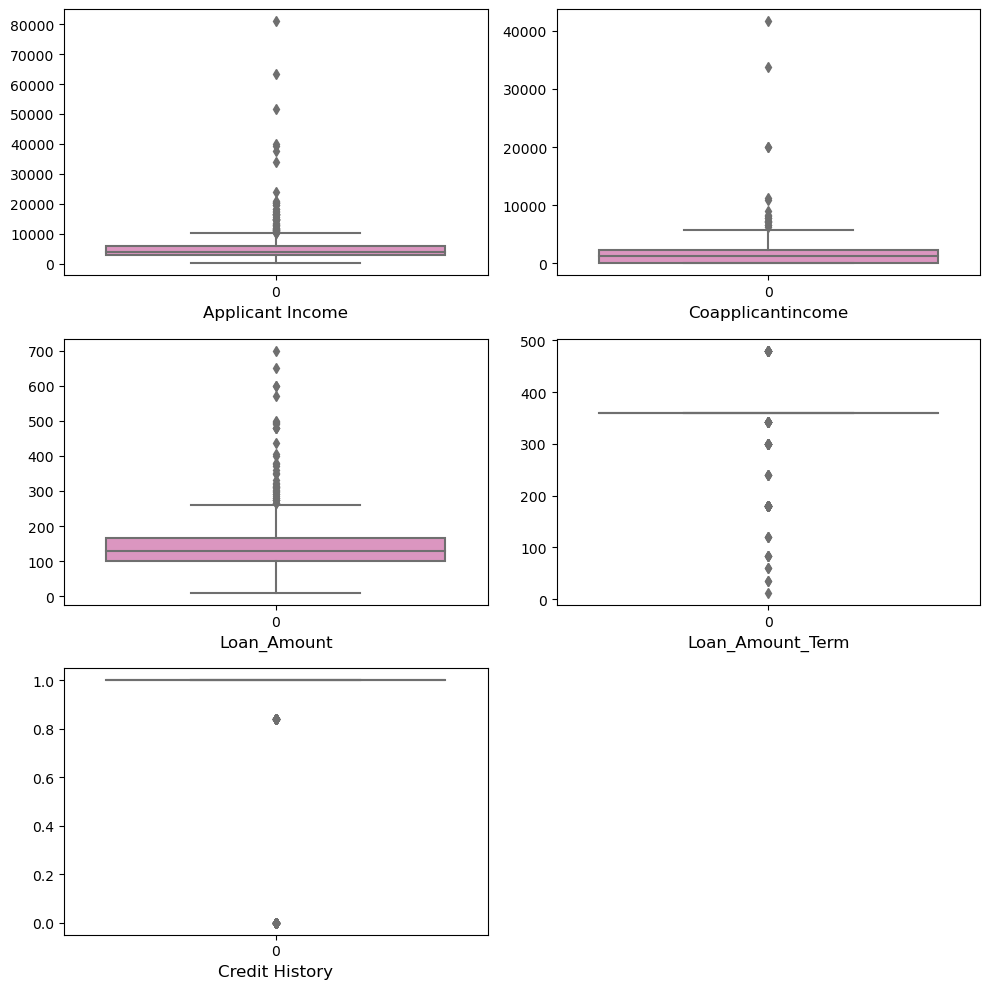

In [34]:
# Checking for outliers by plotting boxplpot
plt.figure(figsize=(10,10),facecolor="white")
plotnumber=1
for col in num_col:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [35]:
df.skew()

Applicant Income     6.539513
Coapplicantincome    7.491531
Loan_Amount          2.726601
Loan_Amount_Term    -2.389680
Credit History      -1.963600
dtype: float64

The columns Applicant Income, Coapplicantincome, Loan_Amount have skewness in the data and we apply cuberoot method to remove skewness

In [36]:
df["Applicant Income"]=np.cbrt(df["Applicant Income"])
df["Coapplicantincome"]=np.cbrt(df["Coapplicantincome"])
df["Loan_Amount"]=np.cbrt(df["Loan_Amount"])

In [37]:
df.skew()

Applicant Income     2.083638
Coapplicantincome    0.196726
Loan_Amount          0.832841
Loan_Amount_Term    -2.389680
Credit History      -1.963600
dtype: float64

The column Applicant Income still have skewness in the data, so we apply cuberoot method one more time to remove skewness

In [38]:
df["Applicant Income"]=np.cbrt(df["Applicant Income"])

In [39]:
df.skew()

Applicant Income     1.030738
Coapplicantincome    0.196726
Loan_Amount          0.832841
Loan_Amount_Term    -2.389680
Credit History      -1.963600
dtype: float64

The column Applicant Income still have skewness in the data, so we apply cuberoot method one more time to remove skewness

In [41]:
df["Applicant Income"]=np.cbrt(df["Applicant Income"])

In [42]:
df.skew()

Applicant Income     0.543922
Coapplicantincome    0.196726
Loan_Amount          0.832841
Loan_Amount_Term    -2.389680
Credit History      -1.963600
dtype: float64

In [43]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Coapplicantincome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,1.113031,0.000000,5.270588,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,1.109684,11.467457,5.039684,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,1.103894,0.000000,4.041240,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,1.101856,13.310098,4.932424,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.113381,0.000000,5.204828,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,1.103432,0.000000,4.140818,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,1.108179,0.000000,3.419952,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,1.117466,6.214465,6.324704,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,1.116604,0.000000,5.718479,360.0,1.0,2.0,1.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   Applicant Income   614 non-null    float64
 6   Coapplicantincome  614 non-null    float64
 7   Loan_Amount        614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


In [45]:
# Statistical summary of numerical columns
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Coapplicantincome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,1.108502,7.480926,5.125758,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.008848,7.108669,0.855009,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.063813,0.000000,2.080084,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.103326,0.000000,4.645444,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.107165,10.592145,5.052774,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.112903,13.194779,5.482031,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.149737,34.668156,8.879040,480.000000,1.000000,2.000000,1.000000


In [46]:
# Checking the correlation between features and target
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Coapplicantincome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.084170,0.208217,0.135750,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.021955,0.280112,0.174273,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.116235,-0.004252,0.163877,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.182019,0.010615,-0.158991,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.190198,-0.074737,0.115086,-0.033943,-0.002260,-0.030860,-0.003700
Applicant Income,0.084170,0.021955,0.116235,-0.182019,0.190198,1.000000,-0.351225,0.528963,-0.030867,0.019195,-0.029438,0.010680
Coapplicantincome,0.208217,0.280112,-0.004252,0.010615,-0.074737,-0.351225,1.000000,0.158113,-0.003778,-0.003044,-0.052318,0.033582
Loan_Amount,0.135750,0.174273,0.163877,-0.158991,0.115086,0.528963,0.158113,1.000000,0.068902,-0.017384,-0.077644,-0.042714
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.030867,-0.003778,0.068902,1.000000,0.001395,-0.077620,-0.020974
Credit History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,0.019195,-0.003044,-0.017384,0.001395,1.000000,-0.001880,0.540483


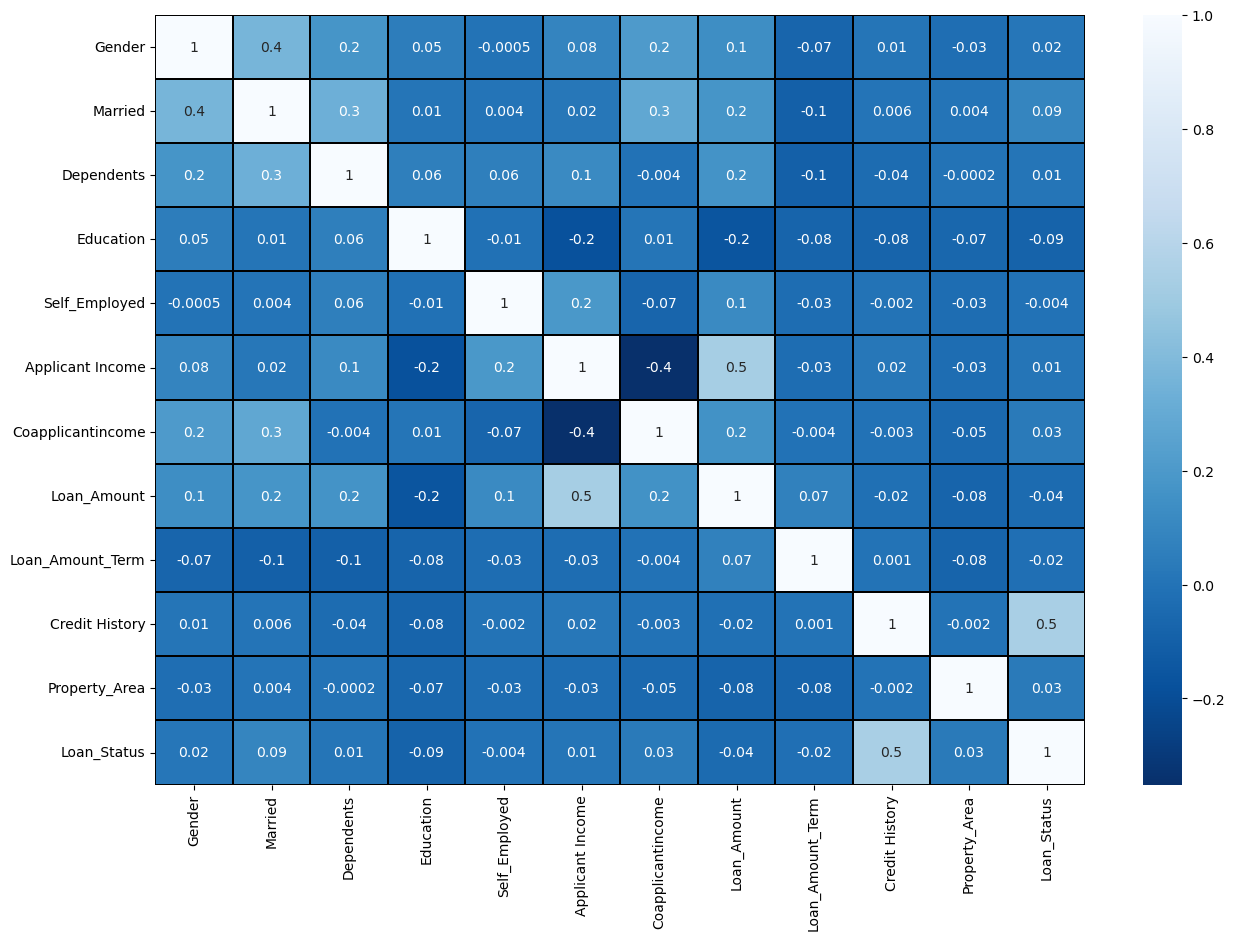

In [47]:
# Visualizing the correlation matrix by plotting the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [49]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit History       0.540483
Married              0.091478
Coapplicantincome    0.033582
Property_Area        0.032112
Gender               0.017987
Applicant Income     0.010680
Dependents           0.010118
Self_Employed       -0.003700
Loan_Amount_Term    -0.020974
Loan_Amount         -0.042714
Education           -0.085884
Name: Loan_Status, dtype: float64

We observe positive and negative correlated features with the target

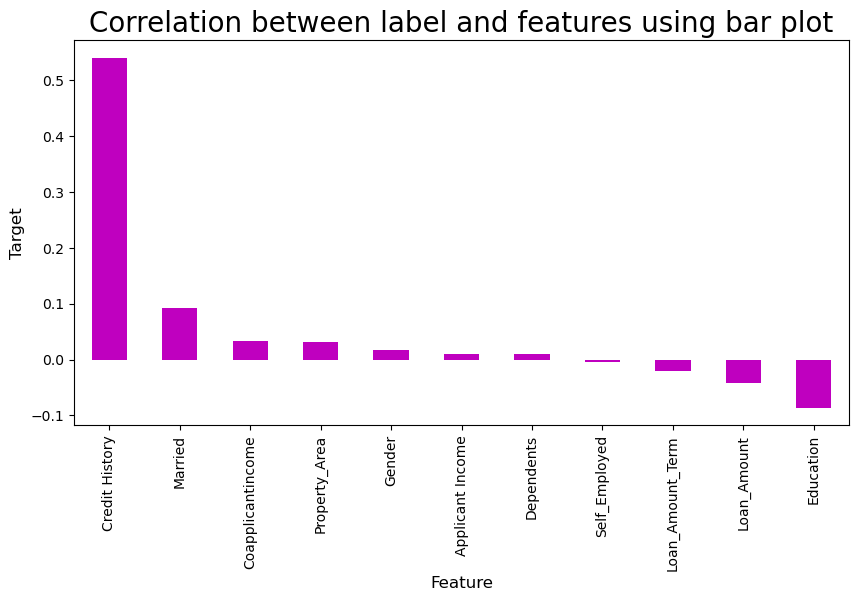

In [50]:
# Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(10,5))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title("Correlation between label and features using bar plot", fontsize=20)
plt.show()

In [51]:
# Separating features and label
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [52]:
# Feature scaling using standard scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Coapplicantincome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.512243,-1.053225,0.169528,0.279851,0.451640,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.133700,0.561256,-0.100752,0.279851,0.451640,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.521213,-1.053225,-1.269462,0.279851,0.451640,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.751704,0.820678,-0.226303,0.279851,0.451640,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.551865,-1.053225,0.092554,0.279851,0.451640,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.573462,-1.053225,-1.152903,0.279851,0.451640,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.036492,-1.053225,-1.996700,-2.518655,0.451640,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.013917,-0.178302,1.403404,0.279851,0.451640,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.916438,-1.053225,0.693799,0.279851,0.451640,1.223298


In [53]:
# Checking Variance Inflation Factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.205048,Gender
1,1.360077,Married
2,1.178702,Dependents
3,1.073121,Education
4,1.041983,Self_Employed
5,2.019423,Applicant Income
6,1.567787,Coapplicantincome
7,1.779411,Loan_Amount
8,1.048005,Loan_Amount_Term
9,1.009615,Credit History


In [54]:
y.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

Here the data is not balanced. Since it is a classification problem, we will balance the data using over sampling method

In [55]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [56]:
y.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [57]:
y1.value_counts()

1.0    422
0.0    422
Name: Loan_Status, dtype: int64

In [59]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxaccu=0
maxrs=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=1)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy is",maxaccu,"at random_state",maxrs)

Best Accuracy is 0.8388625592417062 at random_state 11


The best accuracy is 83.89% at random_state 11

In [60]:
# Classification Algorithms
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [61]:
# Checking accuracy for Random Forest Classifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8056872037914692
[[89 25]
 [16 81]]
              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81       114
         1.0       0.76      0.84      0.80        97

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211



The accuracy for this model is 80.57%

In [62]:
# Checking accuracy for Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.6682464454976303
[[60 54]
 [16 81]]
              precision    recall  f1-score   support

         0.0       0.79      0.53      0.63       114
         1.0       0.60      0.84      0.70        97

    accuracy                           0.67       211
   macro avg       0.69      0.68      0.66       211
weighted avg       0.70      0.67      0.66       211



The accuracy score using Logistic Regression is 66.82%

In [63]:
# Checking accuracy for Gradient Boosting Classifier
GB=LogisticRegression()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.6682464454976303
[[60 54]
 [16 81]]
              precision    recall  f1-score   support

         0.0       0.79      0.53      0.63       114
         1.0       0.60      0.84      0.70        97

    accuracy                           0.67       211
   macro avg       0.69      0.68      0.66       211
weighted avg       0.70      0.67      0.66       211



The accuracy for this model is 66.82%

In [64]:
# Checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.7109004739336493
[[67 47]
 [14 83]]
              precision    recall  f1-score   support

         0.0       0.83      0.59      0.69       114
         1.0       0.64      0.86      0.73        97

    accuracy                           0.71       211
   macro avg       0.73      0.72      0.71       211
weighted avg       0.74      0.71      0.71       211



The accuracy for this model is 71.09%

In [65]:
# Checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.7725118483412322
[[79 35]
 [13 84]]
              precision    recall  f1-score   support

         0.0       0.86      0.69      0.77       114
         1.0       0.71      0.87      0.78        97

    accuracy                           0.77       211
   macro avg       0.78      0.78      0.77       211
weighted avg       0.79      0.77      0.77       211



The accuracy for this model is 77.25%

In [66]:
# Checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8056872037914692
[[93 21]
 [20 77]]
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       114
         1.0       0.79      0.79      0.79        97

    accuracy                           0.81       211
   macro avg       0.80      0.80      0.80       211
weighted avg       0.81      0.81      0.81       211



The accuracy for this model is 80.57%

In [67]:
# Checking accuracy for ExtraTrees Classifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.8199052132701422
[[94 20]
 [18 79]]
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       114
         1.0       0.80      0.81      0.81        97

    accuracy                           0.82       211
   macro avg       0.82      0.82      0.82       211
weighted avg       0.82      0.82      0.82       211



The accuracy for this model is 81.99%

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# Checking cv score for a Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predRFC)-score.mean())

[0.72781065 0.78106509 0.81656805 0.85207101 0.88095238]
0.8116934347703577
Differrence between accuracy score and cross validation score is -0.006006230978888527


In [70]:
# Checking cv score for a Logistic Regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predLR)-score.mean())

[0.69230769 0.73372781 0.68639053 0.68639053 0.6547619 ]
0.6907156945618483
Differrence between accuracy score and cross validation score is -0.02246924906421799


In [71]:
# Checking cv score for a Gradient Boosting Classifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predGB)-score.mean())

[0.69230769 0.73372781 0.68639053 0.68639053 0.6547619 ]
0.6907156945618483
Differrence between accuracy score and cross validation score is -0.02246924906421799


In [72]:
# Checking cv score for a SVM Classifier
score=cross_val_score(SVC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predSVC)-score.mean())

[0.72189349 0.76923077 0.66863905 0.72189349 0.69642857]
0.7156170752324599
Differrence between accuracy score and cross validation score is -0.004716601298810574


In [73]:
# Checking cv score for a AdaBoost Classifier
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predABC)-score.mean())

[0.68639053 0.73964497 0.75739645 0.77514793 0.73214286]
0.7381445477599324
Differrence between accuracy score and cross validation score is 0.034367300581299776


In [74]:
# Checking cv score for a Bagging Classifier
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predBC)-score.mean())

[0.71597633 0.76923077 0.80473373 0.87573964 0.85714286]
0.8045646661031276
Differrence between accuracy score and cross validation score is 0.001122537688341585


In [75]:
# Checking cv score for a ExtrTrees Classifier
score=cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Differrence between accuracy score and cross validation score is", accuracy_score(y_test,predETC)-score.mean())

[0.76923077 0.80473373 0.82248521 0.88757396 0.88095238]
0.8329952099182869
Differrence between accuracy score and cross validation score is -0.013089996648144697


Random Forest Classifier is our best model as the difference between accuracy score and cross validation score is least

# Hyper Parameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'], 'random_state':[10,50,1000],'max_depth':[0,10,20],'n_jobs':[-2,-1,1],'n_estimators':[50,100,200,300]}

In [77]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [78]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [79]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [80]:
Final_model=RandomForestClassifier(criterion='gini',max_depth=20,n_estimators=300,n_jobs=-2,random_state=1000)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

81.99052132701422


# Plotting ROC and AUC for all the models used

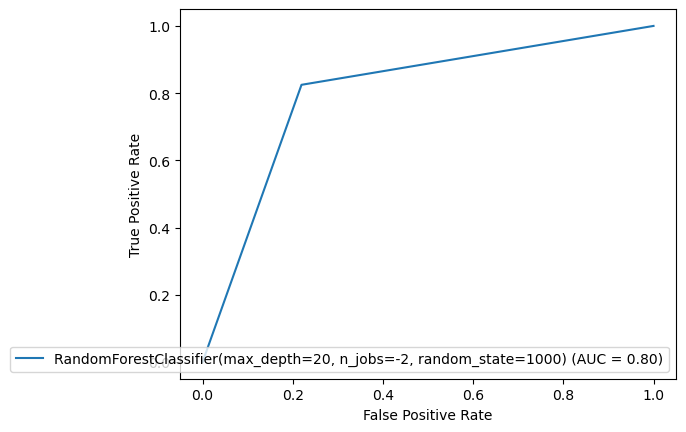

In [83]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

Here we have plotted the ROC curve for the Final model and AUC value for the best model is 81.99%

In [84]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"Loan_Status.pkl")

['Loan_Status.pkl']

In [85]:
# Predicting the saved model
model=joblib.load("Loan_Status.pkl")
prediction=model.predict(x_test)
prediction

array([1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0.])

In [86]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,0.0,1.0
4,1.0,1.0
...,...,...
206,1.0,1.0
207,1.0,1.0
208,0.0,0.0
209,0.0,0.0
